In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [3]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [4]:
path_local_csv = '/Users/mharias/Documents/proyectos/covid/vacunacion/csv/'
#path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [5]:
#datos_row = pd.read_csv(path_escovid19data_csv)

In [6]:
datos_row = pd.read_csv(path_local_csv+'estado_vacunacion_.csv')

In [7]:
dia = '23/3/21' # dia del informe
dia = datetime.today().strftime(format='%-d/%-m/%y')
un_dia = timedelta(days=1)

In [8]:
dia

'12/4/21'

In [9]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,12/4/21,País Vasco,384750.0,52900.0,148200.0,585850,535817,0.914598,400896.0,134921.0,NaN,11/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1390,12/4/21,Ceuta,9000.0,1300.0,5800.0,16100,15799,0.981304,12157.0,3642.0,NaN,9/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1391,12/4/21,Melilla,9000.0,1200.0,5800.0,16000,13690,0.855625,10259.0,3431.0,NaN,10/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1392,12/4/21,Fuerzas Armadas,19500.0,0.0,66100.0,85600,68476,0.799953,63151.0,5325.0,NaN,11/4/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [10]:
datos_row = datos_row[datos_row['ccaa']!='Fuerzas Armadas']

In [11]:
#datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos=datos_row.loc[(datos_row['ccaa']!='Totales')].copy()
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'entregadas_poblacion']=datos['Dosis entregadas']/datos['poblacion']*100000
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [12]:
variacion = pd.DataFrame()

In [13]:
variacion = datos.groupy('date_pub')

AttributeError: 'DataFrame' object has no attribute 'groupy'

In [14]:
datos.columns

Index(['date_pub', 'ccaa', 'Dosis entregadas Pfizer',
       'Dosis entregadas Moderna', 'Dosis entregadas AstraZeneca',
       'Dosis entregadas', 'Dosis administradas', '% sobre entregadas',
       'Total 1 vacuna', 'Total pauta completada',
       'Última fecha de actualización de datos',
       'Fecha de la ultima vacuna registrada', 'source_name', 'source',
       'poblacion', 'entregadas_poblacion'],
      dtype='object')

In [15]:
columnas_interes=['date_pub', 'ccaa','Dosis entregadas','entregadas_poblacion']

In [16]:
datos = datos[columnas_interes]

In [17]:
datos

,date_pub,ccaa,Dosis entregadas,entregadas_poblacion
0,2021-01-04,Andalucía,140295,1664.944896
1,2021-01-04,Aragón,23715,1795.510882
2,2021-01-04,Asturias,23720,2320.274129
3,2021-01-04,Baleares,8940,752.650694
4,2021-01-04,Canarias,20835,943.945452
...,...,...,...,...
1387,2021-04-12,Murcia,359075,24136.283036
1388,2021-04-12,Navarra,172555,26548.311758
1389,2021-04-12,País Vasco,585850,26897.937970
1390,2021-04-12,Ceuta,16100,18976.226678


In [18]:
variacion = datos[['date_pub','entregadas_poblacion']].groupby('date_pub').aggregate(['mean','std'])

In [19]:
variacion.columns = ['mean','std']

In [20]:
variacion['variacion'] = variacion['std']/variacion['mean']

In [21]:
variacion

,mean,std,variacion
date_pub,,,
2021-01-04,1552.521851,431.166630,0.277720
2021-01-05,1633.280290,359.552313,0.220141
2021-01-07,1633.280290,359.552313,0.220141
2021-01-08,1633.280290,359.552313,0.220141
2021-01-11,1633.280290,359.552313,0.220141
...,...,...,...
2021-04-06,25408.740387,4289.112076,0.168805
2021-04-07,25408.740387,4289.112076,0.168805
2021-04-08,25756.210899,4295.398300,0.166771


In [22]:
gap  = datos[['date_pub','entregadas_poblacion']].groupby('date_pub').aggregate(['max','min'])

In [23]:
gap.columns = gap.columns.droplevel()

In [24]:
gap

,max,min
date_pub,,
2021-01-04,2320.274129,752.650694
2021-01-05,2320.274129,1080.988246
2021-01-07,2320.274129,1080.988246
2021-01-08,2320.274129,1080.988246
2021-01-11,2320.274129,1080.988246
...,...,...
2021-04-06,33515.342470,18887.078877
2021-04-07,33515.342470,18887.078877
2021-04-08,33515.342470,18887.078877


In [25]:
gap['ratio'] = gap['max'] / gap['min']

In [26]:
gap

,max,min,ratio
date_pub,,,
2021-01-04,2320.274129,752.650694,3.082803
2021-01-05,2320.274129,1080.988246,2.146438
2021-01-07,2320.274129,1080.988246,2.146438
2021-01-08,2320.274129,1080.988246,2.146438
2021-01-11,2320.274129,1080.988246,2.146438
...,...,...,...
2021-04-06,33515.342470,18887.078877,1.774512
2021-04-07,33515.342470,18887.078877,1.774512
2021-04-08,33515.342470,18887.078877,1.774512


In [27]:
today=datetime.today().strftime('%d-%b-%Y')

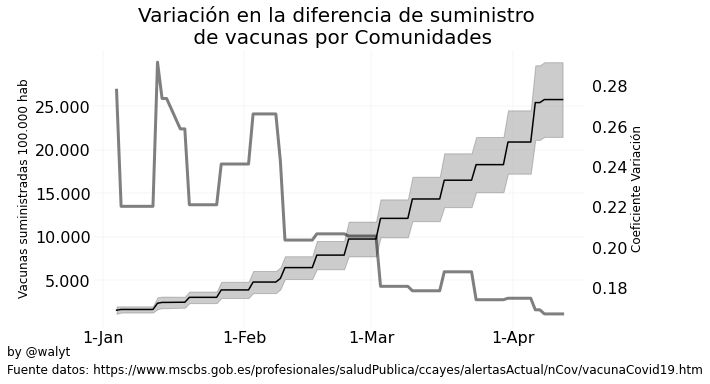

In [28]:
color_ejes = 'black'
color_titulos ='black'
fuente='Fuente datos: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/vacunaCovid19.htm'
autor='by @walyt'

f, ax = plt.subplots(figsize=(9, 5))


sns.lineplot(x="date_pub",
             y="entregadas_poblacion",
             data=datos,
             #hue='ccaa',
             ax=ax,
             ci='sd',
             err_style='band',
             color='black',
            )
#ax.legend(loc=9,fontsize='small',ncol=2)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Variación en la diferencia de suministro \n de vacunas por Comunidades',fontsize=20)
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("")
#ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
ax.grid(False,lw=.1)

XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
"""
ax.xaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax.yaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax.xaxis.set_major_formatter(XmajorFmt)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v: '{:,.0f}'.format(x).replace(',','.')))
ax.xaxis.set_major_locator(DayLocator([1]))

"""
ax.yaxis.set_label_text('Vacunas suministradas 100.000 hab',fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v: '{:,.0f}'.format(x).replace(',','.')))
ax.set_yticks([5000,10000,15000,20000,25000])
ax1= ax.twinx()
sns.lineplot(x="date_pub", y="variacion",
             data=variacion,ax=ax1,lw=3,alpha=.5,color='black')
ax1.xaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
ax1.yaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_ejes,rotation=0)
ax1.xaxis.set_label_text("")
ax1.yaxis.set_label_text('Coeficiente Variación',fontsize=12)

#ax1.set_ylim((0,1))
sns.despine(left=True, bottom=True)


f.subplots_adjust(top=.85,bottom=.2,wspace=0.0,hspace=0.0)

f.text(x=0,y=-.05,s=fuente,color=color_titulos,fontsize=12,ha='left')
f.text(x=0,y=0,s=autor,color=color_titulos,fontsize=12,ha='left')

f.tight_layout()
f.savefig(path_img+'variacion_comunidades.png',dpi=288,bbox_inches = "tight")

In [29]:
datos

,date_pub,ccaa,Dosis entregadas,entregadas_poblacion
0,2021-01-04,Andalucía,140295,1664.944896
1,2021-01-04,Aragón,23715,1795.510882
2,2021-01-04,Asturias,23720,2320.274129
3,2021-01-04,Baleares,8940,752.650694
4,2021-01-04,Canarias,20835,943.945452
...,...,...,...,...
1387,2021-04-12,Murcia,359075,24136.283036
1388,2021-04-12,Navarra,172555,26548.311758
1389,2021-04-12,País Vasco,585850,26897.937970
1390,2021-04-12,Ceuta,16100,18976.226678


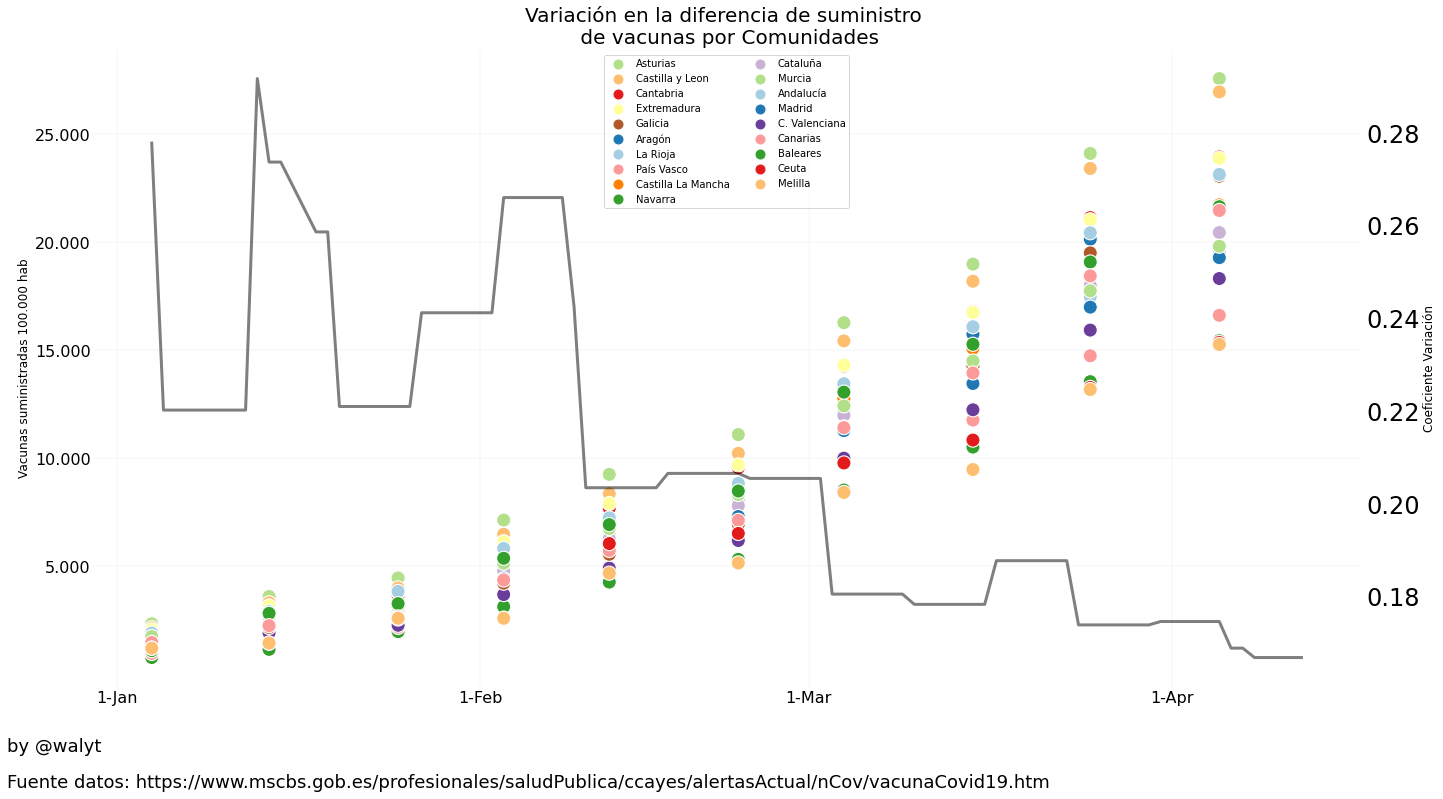

In [40]:
color_ejes = 'black'
color_titulos ='black'
fuente='Fuente datos: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/vacunaCovid19.htm'
autor='by @walyt'

f, ax = plt.subplots(figsize=(20, 10))

serie=datos['date_pub'].unique()[::7]
datos_=datos[datos['date_pub'].isin(serie)]
sns.scatterplot(x="date_pub",
             y="entregadas_poblacion",
             data=datos_,
             hue='ccaa',
             ax=ax,
             ci='sd',
             #err_style='band',
             color='black',
             #lw=4
            s=200,
                palette='Paired'
            )
#ax.legend(loc=9,fontsize='small',ncol=2)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Variación en la diferencia de suministro \n de vacunas por Comunidades',fontsize=20)
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("")
#ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
ax.grid(False,lw=.1)
#ax.legend(loc='upper center',ncol=2,fontsize='xx-large')
XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
"""
ax.xaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax.yaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax.xaxis.set_major_formatter(XmajorFmt)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v: '{:,.0f}'.format(x).replace(',','.')))
ax.xaxis.set_major_locator(DayLocator([1]))

"""
ax.yaxis.set_label_text('Vacunas suministradas 100.000 hab',fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v: '{:,.0f}'.format(x).replace(',','.')))
ax.set_yticks([5000,10000,15000,20000,25000])

handles, labels = ax.get_legend_handles_labels()
handles_labels = [(handles[labels.index(i)],i) for i in lista_ccaa]
leyenda = ax.legend([i[0] for i in handles_labels],[i[1] for i in handles_labels],loc=9,fontsize='medium',ncol=2,markerscale=1.5)
for line in leyenda.get_lines():
    line.set_linewidth(10.0)


ax1= ax.twinx()
sns.lineplot(x="date_pub", y="variacion",
             data=variacion,ax=ax1,lw=3,alpha=.5,color='black')
ax1.xaxis.set_tick_params(labelsize=20,width=0,labelcolor=color_ejes,rotation=0)
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(DayLocator([1]))
ax1.yaxis.set_tick_params(labelsize=24,width=0,labelcolor=color_ejes,rotation=0)
ax1.xaxis.set_label_text("")
ax1.yaxis.set_label_text('Coeficiente Variación',fontsize=12)

#ax1.set_ylim((0,1))
sns.despine(left=True, bottom=True)


f.subplots_adjust(top=.85,bottom=.2,wspace=0.0,hspace=0.0)

f.text(x=0,y=-.1,s=fuente,color=color_titulos,fontsize=18,ha='left')
f.text(x=0,y=-0.05,s=autor,color=color_titulos,fontsize=18,ha='left')

f.tight_layout()
f.savefig(path_img+'variacion_comunidades_detalle.png',dpi=288,bbox_inches = "tight")

In [32]:
handles, labels = ax.get_legend_handles_labels()

In [33]:
labels

[]

In [34]:
tuples = [(handles[labels.index(i)],i) for i in lista_ccaa]

NameError: name 'lista_ccaa' is not defined

In [35]:
handles_ = [i[0] for i in tuples]

NameError: name 'tuples' is not defined

In [36]:
handles_

NameError: name 'handles_' is not defined

In [37]:
lineas = ax.get_lines()

In [38]:
lista_ccaa = datos[datos['date_pub']==today].sort_values('entregadas_poblacion',ascending=False)['ccaa'].tolist()

In [39]:
ultima_fecha = datos.iloc[-1]['date_pub']

In [ ]:
ultima_fecha

In [ ]:
for i in range(19):
    print (lineas[i].get_ydata()[0])
    lineas[i].get_text()

In [ ]:
labels

In [ ]:
datos

In [ ]:
variacion.index[::7]

In [ ]:
datos